# Web Scraping 

We'll be learning how to collect data from web sources. This includes using Python modules and packages to scrape data straight from webpages and Application Programming Interfaces (APIs). We'll also learn how to use so-called "wrappers" around APIs to collect and store data. Since new, fresh data is being created every day on the internet, web scraping opens up huge opportunities for data collection.

This section includes:
- Understanding the Structure of the internet
- Performing simple web scraping
- Parsing HTML from scraped pages
- Using APIs to collect Data
- The ethics and legality of web scraping

## Understanding the structure of the internet

Before undertaking web scraping, it's important to have a rudimentary understanding of how the internet works. Most of us simply interact through web browsers and don't see all the details behind webpages, but behind the images and text that we see in our browser, there's a lot of complex code and data exchange happening.

When we visit a webpage, we type in a web address in our browser address bar and ask for a file from a remote server. The file is returned to us and displayed through our browser. The web addresses we use are URLs, or Uniform Resource Locators.

For e.g. `https://subscription.packtpub.com/book/IoT-and-Hardware/9781789958034`

Is of the form
**[scheme]://[authority][path_to_resource]?[parameters]**

Where:
+ Scheme – https
+ Authority – subscription.packtpub.com
+ Path to resource – book/IoT-and-Hardware/9781789958034
+ Parameters – no parameters used here


The scheme is usually http (Hypertext Transfer Protocol) or https (HTTP Secure) for websites, although many other schemes are possible, such as ftp for file transfer. Within the authority is the domain name (subscription.packtpub.com here). Domain names have a top-level domain on the far right, like com or org, and these domains are broken up into subdomains that are separated by periods. For example, packtpub is a subdomain of the com top-level domain, and subscription is a subdomain of packtpub.

After the authority, we then have a path to a resource we want to retrieve. Here, our path is book/IoT-and-Hardware/9781789958034. However, you might also see a simple path like /index.html. This is the resource, or file, we are retrieving from a remote computer somewhere. After the path, we can also include parameters. These follow a question mark and could look like this: ?key=value. They are similar to a dictionary in Python, with a key and value. These get sent to the web server we are requesting the webpage from, and the server can use these parameters when running its code. For example, we could send a search term via parameters.

### GET and POST requests, and HTML


When we send our request to the server for a webpage, we are using HTTP. This stands for Hypertext Transfer Protocol, which is an application layer protocol used primarily in client-server communication mode. In other words, HTTP is a standard way of sending and retrieving data between computers on the internet. There are several different methods within HTTP, but we're most concerned with the methods GET and POST. These are ways of asking for a resource, like a webpage. Most of the time we are using a GET request, which simply asks for the resource. Other times we can use a POST request to send data along with our request. An example of sending data may be sending some text to an API for the server to perform sentiment analysis and send back the result.

Along with GET and POST requests, we can send headers. These contain extra information as strings that can be passed between our computer and the server we're getting a website from. A common example is a cookie. Cookies are key-value pairs like a dictionary in Python and are often used for personalization and tracking. Cookies can also keep us logged in on a webpage, which can be useful for web scraping.

Once we send our GET request, we get back a webpage with HTML, or Hypertext Markup Language, which is the instructions that tell our browser how to display the page. Here is an example of simple HTML for a page:

In [3]:
from urllib.request import urlopen

url = "https://en.wikipedia.org/wiki/General-purpose_programming_language"

page = urlopen(url).read()

print(page[:500].decode("utf-8"))

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>General-purpose programming language - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"7b250ef3-9364-40


I import the urlopen function from the urllib.request module (which is a Python file in the Python standard library). Then, we use the function by providing a URL as a string. There are other arguments we can provide, like data, but those are for usage with POST requests. Notice at the end of the urlopen() line we use the read() method of the returned object from urlopen(). This reads the data by fetching the page. Then we print out the first 500 characters. You'll notice it looks like this:

In [4]:
data_file_url = "https://docs.misoenergy.org/marketreports/20210203_mom.xlsx"

mom_data = urlopen(data_file_url).read()

print(mom_data[:50])

b'PK\x03\x04\n\x00\x08\x08\x08\x00j\xa4CR\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18\x00\x00\x00xl/worksheets/sheet1'


Notice we use the same urlopen().read() function to retrieve the data – this is because HTTP is a general protocol and works for any type of file or data. Again, when we print out the first few characters, we see it is a bytes object. However, we can't use decode('utf-8') here because it is not text. Instead, we can directly load it into a pandas DataFrame:

In [5]:
import pandas as pd

df = pd.read_excel(mom_data)

df.head()

C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Unnamed: 0,Multiday Operating Margin Forecast Report,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,"Publish Date: February 03, 2021",NaN,NaN,NaN,NaN,NaN
1,NaN,"Market Date: February 03, 2021",NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2/4/21 HE 20**,2/5/21 HE 10**,2/6/21 HE 11,2/7/21 HE 20,2/8/21 HE 09**,2/9/21 HE 20**
4,RESOURCE COMMITTED,73143.8,70132.1,69823.7,80472.5,85188.6,82408.8


Once this code is run, we'll see the first few rows of the data – it worked! We just downloaded a file through HTTP and Python, then loaded it into a pandas DataFrame. In fact, there's an even easier way to do this – we can directly use read_excel() with the URL:

In [7]:
df = pd.read_excel(data_file_url)

df.head()

C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Unnamed: 0,Multiday Operating Margin Forecast Report,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,"Publish Date: February 03, 2021",NaN,NaN,NaN,NaN,NaN
1,NaN,"Market Date: February 03, 2021",NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2/4/21 HE 20**,2/5/21 HE 10**,2/6/21 HE 11,2/7/21 HE 20,2/8/21 HE 09**,2/9/21 HE 20**
4,RESOURCE COMMITTED,73143.8,70132.1,69823.7,80472.5,85188.6,82408.8


Behind the scenes, pandas is using the same urlopen().read() function we did. This works for other pandas read functions as well, such as read_csv().

We can check that the entire file downloaded fine by writing to our hard drive and opening it in Excel: df.to_excel('mom_report.xlsx'). Doing this, we find the format and images of the Excel file didn't download properly. This makes sense, since pandas isn't made to preserve images and Excel formatting – it's only meant to read the string and numeric data. One way to save the entire Excel file with images and formatting is to use Python's built-in file handling:

In [8]:
with open("data\mom_report.xlsx", mode="wb") as file:
    file.write(mom_data)

### Using the requests package

The urllib library works quite well for simple or even moderately complex tasks. For more advanced tasks, the requests package is better. Visiting the documentation's front page, we can see the package boasts advanced capabilities for the modern web, like multipart file uploads and SSL verification.

In [10]:
import requests as rq

url = "https://en.wikipedia.org/wiki/General-purpose_programming_language"

response = rq.get(url)


response.text[:500]

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>General-purpose programming language - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"7b250ef3-9364-40'

First, we import the requests library and alias it as rq. Then we use a GET request to retrieve the Wikipedia general-purpose programming language page, which returns an object of type requests.models.Response (you can verify this with the type() function). Finally, we are able to get the text from the response with the attribute text. Looking at this text, we can see it's a character string and not a bytestring.

There are many other attributes and methods of requests Response objects. Some of the important ones are status_code, ok, content, and json(). The status_code attribute (response.status_code) stores the server's HTTP response code. 
- For a normal, successful web request, this is 200, or at least in the range 200-299. 
- The 400s mean something went wrong on our end, and the 500s mean an error happened on the server's end. 
- There are also other codes in the 100s for informational responses and in the 300s for redirects. 

The ok attribute is similar and returns True if the status code is under 400 (not an error). We can use these attributes (status_code and ok) if we are looping through webpages and want to check if a request was successful.

The content attribute gives us the raw data as a bytestring. We can use this to download a file, like with urllib:

### Scraping Several Files

It can be useful to download a collection of files from a website for data analysis. For example, the MOM reports from MISO span years and hundreds of Excel files. While we could hire an intern to manually download all of them, that's not a very fun job or a good use of human potential. Instead, we can use urllib or requests to download the files as we saw. Oftentimes, files online will follow patterns.

If we examine the URL of a few files, we can usually deduce the pattern and represent it in our Python code.

Two of the URLs for the Excel files look like this:

- https://docs.misoenergy.org/marketreports/20210202_mom.xlsx
- https://docs.misoenergy.org/marketreports/20210201_mom.xlsx


The pattern here is easy – the date is used in the filename. The rest of the URL stays constant. In other cases, the URL may increment sequentially. If we want to download all the data, we can view the oldest file available and use that as our starting date. In this case, the oldest date is from 2019, and the newest date is currently 2021. We can create a string that we can format with the dates, and use pandas to create a date range:

In [13]:
# Increamenting date range from 20191106

dates = pd.date_range(start="20191106", end="20220315")

# Format the date string
dates = dates.strftime(date_format="%Y%m%d")


Index(['20191106', '20191107', '20191108', '20191109', '20191110', '20191111',
       '20191112', '20191113', '20191114', '20191115',
       ...
       '20220306', '20220307', '20220308', '20220309', '20220310', '20220311',
       '20220312', '20220313', '20220314', '20220315'],
      dtype='object', length=861)

I create the url variable with a placeholder for the date string using curly brackets. We can insert a string into these curly brackets with url.format('20191106'), as we'll see shortly. Next, we create a date range from the earliest data on MISO to the current date at the time of writing. You can update the end parameter to match the current date when you are reading this. Then, we use the strftime method of pandas datetime objects, which stands for "string format time." This converts the datetime objects into strings with the year, month, and day, just like they are in the MISO files. The function takes a date_format argument, which uses datetime format codes. We are specifying a 4-digit year with %Y and a 2-digit month and day with %m and %d.

To download several files while scraping the web do the ff:

In [19]:
import os

from urllib.request import urlretrieve

from urllib.error import HTTPError

for date in dates:
    url = f"https://docs.misoenergy.org/marketreports/{date}_mom.xlsx"
    filename = f"data/excel_downloads/{date}_mom.xlsx"
    if os.path.exists(filename):
        continue
        
    try:
        urlretrieve(url, filename)
    except HTTPError:
        continue
        
print("All Downloads have executed successfully")

All Downloads have executed successfully


I first format the filename with the date string, check if the file exists, then download the file. When we download the file, we are using a try-except block. This is a way of gracefully handling errors in Python and continuing on with our code. Some of the dates are not present in the data. For example, the first date missing is 11-24-2019. When we try to download a file that isn't there, we get a 404 error ("Not Found"). If you want to see the error, you can run this line of code: urlretrieve(url.format('20191124'), filename). 

To handle this, we can import the **HTTPError** exception from urllib. The try-except blocks have the keywords try and except followed by colons, like an if-else statement. Lines that are indented after try: and except: are executed in those blocks. The code in try: is tried first, and upon an error, we can go to the except blocks that follow it (you can have as many as you want). We can provide a specific exception to look for, like HTTPError in this case. If we don't provide an exception, it catches all errors. The continue keyword in the except block takes us to the next iteration in the loop, though we could also use the keyword pass, which does nothing.

Notice in urlretrieve() we are formatting the url string with the format() method. This built-in string method takes any number of arguments and replaces the curly bracket pairs in the string with the arguments provided to the function, and this is how we dynamically generate URLs based on our date range here.

Also note we are using the os module to check if the file exists at the beginning of each loop – there is no reason to download it again if we already have it. In fact, most of the files are included with the GitHub repository for this book, so you only need to update it with the latest files at the time when you read the book. If the os.path.exists(filename) function returns True (the file exists), then the continue keyword takes us to the next iteration in the loop.

### Extracting the data from the scraped files

Now that we have so much more data, we can use the same function, extract_miso_forecasts(), from Chapter 6, Data Wrangling Documents and Spreadsheets, to extract data from all the spreadsheets. The only thing we changed in the function is adding a try-except block when loading the data. It turns out the older reports only had one worksheet with a different sheet name. If we are using xlrd to load the data, then we can import the proper exception. For another library like openpyxl, the error will be slightly different. To find how to import the error, we can query an internet search engine, but we can also search the package's source code for the exception on GitHub if it's available there. This will help us figure out how to properly import the exception. Here is the update to the extract_miso_forecasts():

In [23]:
import os

from xlrd import XLRDError

from glob import glob


def extract_miso_forecasts(path):
    """
    Takes a filepath to .xlsx MISO MOM reports and extracts wind and load forecasts.
    Saves data to an Excel file - miso_forecasts, and returns the DF
    """
    # Get the excel files
    excel_files = glob(os.path.join(path, "*mom.xlsx"))
    full_forecast_df = None
    for file in excel_files:
        try:
            # Read the content of the excel file
            miso_df = pd.read_excel(file, sheet_name="MISO", skiprows=4, nrows=17, index_col=0, usecols=range(7)) 
        
        except (XLRDError, ValueError):
            miso_df = pd.read_excel(file, sheet_name="MOM Report", skiprows=4, nrows=17, index_col=0, usecols=range(7))
            
        else:
            # Using loc to call the index row / for index filtering
            load = miso_df.loc["Projected Load", :].to_list()
            wind = miso_df.loc["Renewable Forecast", :].to_list()
        
            # Creating labels 
            load_labels = [f"load_d{data}" for data in range(1, 7)]
            wind_labels = [f"wind_d{data}" for data in range(1, 7)]
        
            # Getting the date from the file name
            date = pd.to_datetime(file.split("\\")[-1].split("_")[0])
        
            # Create and Append the DataFrame        
            data_dict = {col: value for col, value in zip(load_labels + wind_labels, load + wind)}
            forecast_df = pd.DataFrame.from_records(data=data_dict, index=[date])
        
            if full_forecast_df is None:
                full_forecast_df = forecast_df.copy()
        
            else:
                full_forecast_df = pd.concat([full_forecast_df, forecast_df])
        
    
    # Sort index
    full_forecast_df.sort_index(inplace=True)
    # Create an excel file
    full_forecast_df.to_excel("miso_forecasts.xlsx")
    return full_forecast_df
        
        
final_df = extract_miso_forecasts(path = "data/excel_downloads/")

final_df.tail(10)

C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openp

C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openp

C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openp

C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openp

C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openp

C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openp

C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openp

C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openp

C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openp

C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openp

C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openp

C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openp

C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openp

C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openp

C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openp

C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openp

C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openp

C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openp

C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openp

C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openp

C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openp

C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openp

C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openp

,load_d1,load_d2,load_d3,load_d4,load_d5,load_d6,wind_d1,wind_d2,wind_d3,wind_d4,wind_d5,wind_d6
2022-03-06,78231.0,78802.0,78599.0,78379.0,78143.0,78710.0,9336.6,14049.0,9737.3,13877.0,15342.3,11545.8
2022-03-07,80954.0,79214.0,79395.0,78095.0,80539.0,76452.0,14066.8,10552.0,8342.7,20172.6,12680.2,16675.0
2022-03-08,81489.0,81686.0,80491.0,80617.0,75148.0,79906.0,12181.8,5626.5,15919.1,10269.5,12330.3,25228.8
2022-03-09,83005.0,81479.0,80676.0,75149.0,79492.0,77349.0,5073.1,15163.3,12554.7,23015.3,10078.2,12764.5
2022-03-10,81333.0,81267.0,76086.0,80344.0,77813.0,75863.0,16728.1,11112.8,22538.6,14303.6,7792.0,22032.2
2022-03-11,81589.0,76148.0,80024.0,76789.0,75854.0,73095.0,10642.2,22539.6,12783.2,7819.5,18797.9,13399.5
2022-03-12,77455.0,80991.0,77338.0,76071.0,74157.0,73105.0,15247.1,12565.9,6541.6,19685.8,14384.2,6898.9
2022-03-13,81178.0,77145.0,75824.0,73979.0,73217.0,67935.0,13225.4,7046.6,20296.2,11501.9,6020.5,6099.1
2022-03-14,75752.0,75249.0,73812.0,72946.0,68728.0,66219.0,7288.5,18749.7,13320.2,7335.0,12137.7,19198.5
2022-03-15,73913.0,73347.0,72849.0,69266.0,65848.0,72478.0,17773.5,14258.5,8673.1,8732.6,14657.5,13565.9


<AxesSubplot:>

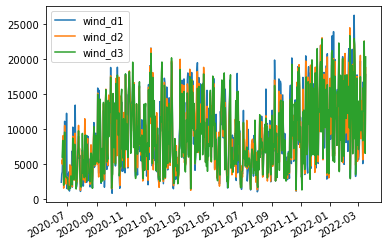

In [25]:
import matplotlib.pyplot as plt 

plot_df = pd.concat([final_df["wind_d1"], final_df["wind_d2"].shift(), final_df["wind_d3"].shift(2)], axis = 1)

plot_df.index += pd.DateOffset(1)
                     
plot_df.plot()

## Parsibg HTML from Scraped Pages

For gathering data from pages where JavaScript plays a heavy role, we can instead use other packages, like `requests-html`, `Selenium`, or the Scrapy package with the `scrapy-splash plugin`. The point is, you may notice some data missing when scraping data from pages. This could be due to JavaScript loading content, meaning you should try one of those other packages for scraping data from that page.

In [26]:
url = "https://en.wikipedia.org/wiki/General-purpose_programming_language"

wiki_text = urlopen(url).read().decode("utf-8")

wiki_text[:50]

'<!DOCTYPE html>\n<html class="client-nojs" lang="en'

We don't need any of the extra functionality of requests, so we'll stick with urllib for now. Remember that the read() method loads the bytestring from the request, and the decode() method converts it to a character string.

Once we have the text of the HTML, we can parse it. The two main libraries for parsing and searching HTML are Beautiful Soup and lxml. These can be installed with conda install -c conda-forge beautifulsoup4 lxml -y. We will call Beautiful Soup by its import name, bs4, from now on. Parsing HTML with bs4 and lxml makes it searchable, so that we can find things like lists, links, and other elements within webpages.

The lxml package actually does the parsing, and bs4 provides the framework for easily searching the parsed HTML. Let's import the two libraries:

In [27]:
# Standard way of importing bs4
from bs4 import BeautifulSoup as bs

import lxml

# Parse the text 
soup = bs(wiki_text)



The first argument to the BeautifulSoup class initializer is our HTML text. We can also provide a second argument to specify the parser. There are three main parsers available:

- html.parser - built-in with Python
- lxml - fast
- html5lib - best for broken HTML

Most of the time lxml works fine, but if the HTML has missing closing tags (for example, a `<p>` tag without a matching `</p>` tag), html5lib may work best. Once we have our HTML parsed, we can search it. In this case, we are going to get the links to all the programming languages on the page. First, let's retrieve all the links and print out the 101st link:

In [32]:
links = soup.find_all("a")

print(links[102])

<a class="external text" href="https://en.wikipedia.org/w/index.php?title=General-purpose_programming_language&amp;action=edit">expanding it</a>


In [35]:
soup.find_all("a", text="Python")

[<a href="/wiki/Python_(programming_language)" title="Python (programming language)">Python</a>]

We can see the text in between the a tags is exactly "Python". It is also possible to match a pattern instead of an exact string match. For this, we need to use the re module from Python, which enables us to use regular expressions. These are sequences of characters that define a search pattern. For example, if we want to find links that contain "programming" and any other characters, we can use a regex (regular expression):

In [36]:
import re

soup.find_all("a", text=re.compile(".*programming*"))

[<a class="external text" href="//www.google.com/search?as_eq=wikipedia&amp;q=%22General-purpose+programming+language%22" rel="nofollow">"General-purpose programming language"</a>,
 <a href="/wiki/Programming_language" title="Programming language">programming language</a>,
 <a class="mw-redirect" href="/wiki/Domain-specific_programming_language" title="Domain-specific programming language">domain-specific programming language</a>,
 <a href="/wiki/Systems_programming" title="Systems programming">Systems programming</a>,
 <a href="/wiki/Programming_language" title="Programming language">programming-language</a>,
 <a dir="ltr" href="https://en.wikipedia.org/w/index.php?title=General-purpose_programming_language&amp;oldid=1073854513">https://en.wikipedia.org/w/index.php?title=General-purpose_programming_language&amp;oldid=1073854513</a>]

We first need to import the built-in re module, then we can use the compile function to create a regex. Here, we are using a period for a wildcard to match any character, then an asterisk after the period to signify we should have 0 or more of these matches to any character. We do this at the beginning and end of the string, so that any text in `<a>` tags with "programming" in it will be returned. Regular expressions can be used in the other parts of bs4 functions as well, like the name argument and strings in the attrs arguments.

### Using XPath, lxml and bs4 to extract data from Webpages

Next, let's see how we can extract the links to the programming languages under the List section. It's usually useful to inspect the page from our browser. We can do this by right-clicking (Ctrl + click on Mac) on an area of the page and choosing Inspect or Inspect Element depending on your browser. This brings up the browser developer tools. You should see a new subdivision of your screen, like this (it may also be a horizontal split):


One way to easily find an element after inspecting it is using an XPath, which stands for XML Path Language. It's an expression language, like regex, that allows us to search XML and HTML documents. We can obtain the XPath for an element on a page by right-clicking the element in the inspector, then choosing Copy

In [59]:
import lxml.html

tree = lxml.html.fromstring(wiki_text)

# Note that the last a is to get the annotation in the list
link_div = tree.xpath('//*[@id="mw-content-text"]/div[1]/div[3]/ul//a')

First, we import the lxml.html module, and use its fromstring() function to convert our HTML string into an lxml object we can search. Next, we use the xpath() method of this object to search for our XPath we copied from the browser. This returns a list of elements that match this XPath. The simplest way to get the elements in the list is to modify the XPath to get all links within this div element. Let's first understand how XPath works.

The XPath expression format follows a pattern: the forward slash (/) means the root node (the top-most element in our HTML, usually <html>), and the asterisk (*) is a wildcard to match any element. For example, we can see the root node is html, as expected with this line of code, which returns html:

In [60]:
tree.xpath('/*')[0].tag

'html'

Two forward slashes specify that the element can be anywhere in the document. So the expression tree.xpath('//*') should return all elements from the document. The square brackets with @id="mw-content-text" in our XPath signifies an attribute to match. So, with the expression `//*[@id="mw-content-text"]`, we are retrieving any element in the document that has an id value of "mw-content-text". This matches a div element that holds the main content of the page. Next, we can specify paths to the elements we want. The rest of our XPath is /div[1]/div[3], which means we are getting the first div element inside of id="mw-content-text" div with div[1], then getting the third div inside of that with div[3]. If we want to find all link elements (a) anywhere inside of this path, we simply add //a to our XPath like so:

In [61]:
wiki_url = 'https://wikipedia.org'


links = [wiki_url + link.attrib["href"] for link in link_div]


print(links)

['https://wikipedia.org/wiki/C_(programming_language)', 'https://wikipedia.org/wiki/C%2B%2B', 'https://wikipedia.org/wiki/C_Sharp_(programming_language)', 'https://wikipedia.org/wiki/Clojure', 'https://wikipedia.org/wiki/Crystal_(programming_language)', 'https://wikipedia.org/wiki/Dart_(programming_language)', 'https://wikipedia.org/wiki/Delphi_(software)', 'https://wikipedia.org/wiki/Elixir_(programming_language)', 'https://wikipedia.org/wiki/Erlang_(programming_language)', 'https://wikipedia.org/wiki/F_Sharp_(programming_language)', 'https://wikipedia.org/wiki/Go_(programming_language)', 'https://wikipedia.org/wiki/Harbour_compiler', 'https://wikipedia.org/wiki/Haskell_(programming_language)', 'https://wikipedia.org/wiki/Java_(programming_language)', 'https://wikipedia.org/wiki/JavaScript_(programming_language)', 'https://wikipedia.org/wiki/Julia_(programming_language)', 'https://wikipedia.org/wiki/Kotlin_(programming_language)', 'https://wikipedia.org/wiki/Lua_(programming_language)

### Collecting Data From Several Links


The idea here is to see the top n-grams for the general-purpose programming language pages, to see what's talked about most on the pages. To get the text from each of the pages we have links to, we loop through the pages and collect text from the p tags, and join the text together with the join() method of strings:

In [63]:
all_text = []

for link in links:
    html = rq.get(link).text
    soup = bs(html)
    paragraph_text = soup.find_all("p")
    all_text.extend([p.text for p in paragraph_text])
    
    
text = " ".join(all_text)

For each of our links, we use requests to fetch the page and extract the HTML text from it. Then we convert it to a bs4 object and find all the p elements. These are paragraph elements that hold the text, which we can see by manually examining the page. We then use the extend method of lists to concatenate another list to the end of it. In this case, we concatenate the list containing text from each of the p elements to the all_text list. Once the loop is done, we join the text together with a single space between each element in the all_text list.



In [64]:
import string

from nltk import FreqDist, bigrams

from nltk.corpus import stopwords

en_stopwords = set(stopwords.words("english"))

translator = str.maketrans("", "", string.punctuation + string.digits)

cleaned_text = text.translate(translator)

cleaned_words = [word for word in cleaned_text.lower().split() if word not in en_stopwords and len(word) > 3]


We first make the necessary imports for the string module and the nltk library, then remove punctuation, digits, and stopwords. Remember that the str.maketrans() function takes three arguments: the third argument maps all characters in that argument to None, and the first two arguments should be left as empty strings for our purposes here.

Then we use this translator object to remove punctuation and digits from the text.

Lastly, we lowercase the text and split it into words (by splitting on any whitespace) using the lower() and split() methods of strings. We only keep words that are not in the en_stopwords set and are longer than three characters long.

Once we have our cleaned words, we can create unigram and bigram frequency distributions from it:

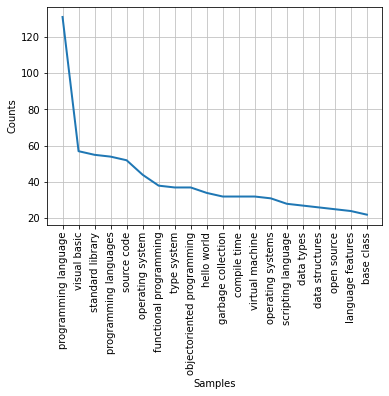

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [66]:
unigram_freq = FreqDist(cleaned_words)

bg = [" ".join(bigr) for bigr in bigrams(cleaned_words)]

bg_fd = FreqDist(bg)

bg_fd.plot(20)

We can see "programming" and "language" are two of the top words – we should add these to our stopwords since they aren't telling us much. We do see a lot of talk about visual basic and the standard library (probably for C languages). We also see that functional and object-oriented programming languages are talked about most out of the types of programming languages, even though there are other types of programming languages, like declarative languages. This clues us in to the type of characteristics that are important for general-purpose programming languages.

A common typo when people try to write "web scraping" is "web scrapping". The word "scrapping" from "scrap" means to discard, unlike the word "scrape" from "web scraping". This concludes our brief tour of basic web scraping; however, there are many more advanced methods within the topic. For example, we can create scraping spiders that will crawl the web or entire websites (manually, or with the Scrapy library). We also may need to deal with JavaScript, for which we can use the requests-html package, Scrapy with scrapy-splash, or Selenium. Note that Selenium is not intended for web scraping, although it works for the purpose. It is rather slow but also offers the advantage of browser automation. For example, we can easily click different buttons, log in by sending keystrokes to the webpage, and even combine Selenium with the pyautogui package to control the mouse and keyboard. For example, some webpages load content dynamically as you scroll down the page. Selenium allows us to send JavaScript commands to scroll down the page, or we can use pyautogui to scroll down the page to load more content. However, it is often possible to find the base web requests that are being used from careful sleuthing of the Network tab in the browser developer tools; then we can use the requests library to collect the data more directly.

## Using APIs to Collect Data

API stands for Application Programming Interface, and these allow us to interface between two different software applications. For example, we can use Python with requests to collect data from MISO directly.

`https://api.misoenergy.org/MISORTWDDataBroker/DataBrokerServices.asmx?messageType=getWindForecast&returnType=json`


We can see that the subdomain of misoenergy.org is api, which makes sense (as we are using an API). We then see the path takes us to an asmx file. After that, we have some parameters that follow the question mark. We are specifying that we want to get the wind forecast in JSON format with the two parameters specified by messageType=getWindForecast&returnType=json. We can see how these parameters have a name, then an equals sign, then the value of the parameter. The parameters are separated by an ampersand (&). Most API calls are going to have some sort of data sent with the request, like options or login credentials. APIs usually have documentation, but because this one is simple, there doesn't seem to be documentation.

In [67]:
url = "https://api.misoenergy.org/MISORTWDDataBroker/DataBrokerServices.asmx?messageType=getWindForecast&returnType=json"

res = rq.get(url)

print(res.json())

{'MktDay': '03-20-2022', 'RefId': '20-Mar-2022 - Interval 05:00 EST', 'Forecast': [{'DateTimeEST': '2022-03-20 12:00:00 AM', 'HourEndingEST': '1', 'Value': '8532.00'}, {'DateTimeEST': '2022-03-20 1:00:00 AM', 'HourEndingEST': '2', 'Value': '8477.00'}, {'DateTimeEST': '2022-03-20 2:00:00 AM', 'HourEndingEST': '3', 'Value': '8273.00'}, {'DateTimeEST': '2022-03-20 3:00:00 AM', 'HourEndingEST': '4', 'Value': '7974.00'}, {'DateTimeEST': '2022-03-20 4:00:00 AM', 'HourEndingEST': '5', 'Value': '7926.00'}, {'DateTimeEST': '2022-03-20 5:00:00 AM', 'HourEndingEST': '6', 'Value': '8090.00'}, {'DateTimeEST': '2022-03-20 6:00:00 AM', 'HourEndingEST': '7', 'Value': '8397.00'}, {'DateTimeEST': '2022-03-20 7:00:00 AM', 'HourEndingEST': '8', 'Value': '8719.00'}, {'DateTimeEST': '2022-03-20 8:00:00 AM', 'HourEndingEST': '9', 'Value': '8603.00'}, {'DateTimeEST': '2022-03-20 9:00:00 AM', 'HourEndingEST': '10', 'Value': '8025.00'}, {'DateTimeEST': '2022-03-20 10:00:00 AM', 'HourEndingEST': '11', 'Value': '

We can see it's the same data as before (the ... once again indicates that not all data is shown). If we look at the JSON data, it's a Python dictionary with keys and values. We can examine these with res.json().keys(), and there are three keys we can see above: 'MktDay', 'RefId', and 'Forecast'. The forecast wind power is under the Forecast key, and we can use a JSON-parsing function from pandas to easily parse this into a DataFrame:

In [68]:
# Parse from json to dataframe

miso_df = pd.json_normalize(res.json()["Forecast"])

# Deserializing json
miso_df.head()

,DateTimeEST,HourEndingEST,Value
0,2022-03-20 12:00:00 AM,1,8532.00
1,2022-03-20 1:00:00 AM,2,8477.00
2,2022-03-20 2:00:00 AM,3,8273.00
3,2022-03-20 3:00:00 AM,4,7974.00
4,2022-03-20 4:00:00 AM,5,7926.00


### Using API Wrappers


For more complex APIs, we may need to provide authentication credentials and the URL may become complex. If an API is used frequently or by lots of people, someone has usually written a wrapper for it. An API wrapper is a package in another software that makes it easier for us to use the API.

An example of an API wrapper is the PRAW package in Python, which stands for "Python Reddit API Wrapper." Reddit is a social media website where people discuss a huge range of topics, and we can use this data for data science projects. For example, we can perform sentiment analysis on different topics, we can perform topic modeling to see what people are talking about, or we can monitor social media for public safety. Installing the praw package can be done using conda: conda install -c conda-forge praw -y. Then, we can create a praw.Reddit object, which will allow us to use the API:

In [69]:
import praw

reddit = praw.Reddit(
    client_id = "NeqO6acVKNk63OlWmawZmg",
    client_secret = "62szdaFUUTa9gDrLre1oPpyzJNmd6g",
    user_agent = "practical_ds_demo"
)


post_text_list = []

comment_text_list = []

for post in reddit.subreddit("python").hot(limit=100):
    post_text_list.append(post.selftext)
    # Removes the "show more comments" instances
    post.comments.replace_more(limit=0)
    for comment in post.comments.list():
        comment_text_list.append(comment.body)

# Join to a single text
all_text = " ".join(post_text_list + comment_text_list)

all_text[ : 50]

"Tell /r/python what you're working on this week! Y"

First, we create some empty lists to hold the text data from each post and the text data from the comments on the posts. Then we use the subreddit() method of our reddit object to target a specific subreddit. Within this, we retrieve the top 100 "hot" posts – viewing "hot" posts is one of the options on Reddit, along with "new" and "top" posts. For each post, we get the text with post.selftext. Then we get the comments with post.comments. The post.comments.replace_more(limit=0) line of code removes any instances of "show more," which are links in the comments sections. If we run the code without this line, we end up with an error when trying to loop through the comments. Then we loop through the comments, which we retrieve as a list with post.comments.list(), and retrieve the text of each comment with c.body, appending it to our overall comment list. Finally, we make one large string of all post and comment text, each separated by a space, using the join() method of Python strings.



We can also use other documentation examples to get started, then take our Python objects and see what methods they have available. One way to do this is to type the variable name with a period after it, like post., then hit the Tab key in Jupyter or IPython. This will suggest autocompletions, showing us the attributes and methods.

We could also use the dir() function in Python to list out all attributes and methods, like dir(post). You can try this with the c and post variables after running the code example above – these variables will hold the value of the comment and post from the last iteration in the loop.

Once we have our text data, we can clean it and look at the top n-grams. Cleaning is similar to what we've done before: removing punctuation, digits, and stopwords. Note that because the stopwords in the NLTK stopword set have punctuation, not all stopwords are properly removed. We could remove stopwords after lowercasing but before removing punctuation to remedy this, or simply add some stopwords without punctuation to our stopwords set. Since the word "don't" showed up in the top bigrams, I added it to the stopwords as "dont" so it is removed from the text after we remove punctuation. We also add "removed" to the stopwords, since this shows up in text for comments or posts that were deleted or taken down by moderators. Our cleaning code looks like this:

In [70]:
translator = str.maketrans('', '', string.punctuation + string.digits)
cleaned_text = all_text.translate(translator)

# Adding words to the stop words\
reddit_stopwords = set(['removed', 'dont']) | en_stopwords


cleaned_words = [word for word in cleaned_text.lower().split() if word not in reddit_stopwords and len(word) > 3]



As we did earlier in the web scraping section, we use a translator to remove punctuation and digits. Then we combine the English stopwords set with our new stopwords using a `set union (|)`. Finally, we loop through our lowercased words and keep them if they are not stopwords and are longer than three characters. Then we can look at the top bigrams:

In [72]:
bg = [' '.join(bigr) for bigr in bigrams(cleaned_words)]
bg_fd = FreqDist(bg)
bg_fd.most_common(20)


[('digit sequence', 80),
 ('quantum digit', 77),
 ('sequence found', 76),
 ('found quantum', 75),
 ('quantum number', 42),
 ('number quantum', 40),
 ('average upvotes', 19),
 ('negative sentiment', 17),
 ('something like', 16),
 ('elden ring', 16),
 ('learning python', 16),
 ('ranked bottom', 15),
 ('random number', 14),
 ('reviewers reviewers', 13),
 ('programming language', 12),
 ('verifiable purchased', 12),
 ('makes sense', 12),
 ('using python', 11),
 ('feel free', 11),
 ('open source', 11)]

We can see that at the time of data collection, people are talking a lot about quantum computing with python.

There are tons of other social media API wrappers out there, for Twitter, Facebook, and others. People have also written social media web scraper wrappers, like the facebook-scraper package. These don't use the API and instead use web scraping to collect data but can be used similarly to an API wrapper.